# Employee Attrition EDA  and Prediction Using Machine Learning


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
os.chdir(r"C:\Users\hp\Desktop\csv2")

In [3]:
ibm=pd.read_csv("IBM.csv")

# Exploratory Data Analysis(EDA)

In [5]:
ibm

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
1,49.0,No,Research & Development,8.0,1,Life Sciences,3,2,Married,5130.0,1,3,10
2,37.0,Yes,Research & Development,NaN,2,Other,4,3,NaN,2090.0,6,3,0
3,NaN,NaN,Research & Development,NaN,4,Life Sciences,4,3,NaN,2909.0,1,3,8
4,NaN,NaN,Research & Development,NaN,1,Medical,1,2,NaN,3468.0,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Research & Development,23.0,2,Medical,3,4,Married,2571.0,4,3,5
1466,39.0,No,Research & Development,6.0,1,Medical,4,1,Married,9991.0,4,3,7
1467,27.0,No,Research & Development,4.0,3,Life Sciences,2,2,Married,6142.0,1,3,6
1468,49.0,No,Sales,2.0,3,Medical,4,2,Married,5390.0,2,2,9


In [6]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1462 non-null   float64
 1   Attrition                1462 non-null   object 
 2   Department               1462 non-null   object 
 3   DistanceFromHome         1461 non-null   float64
 4   Education                1470 non-null   int64  
 5   EducationField           1457 non-null   object 
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobSatisfaction          1470 non-null   int64  
 8   MaritalStatus            1459 non-null   object 
 9   MonthlyIncome            1460 non-null   float64
 10  NumCompaniesWorked       1470 non-null   int64  
 11  WorkLifeBalance          1470 non-null   int64  
 12  YearsAtCompany           1470 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 149.4+ KB


In [7]:
ibm.isna().sum()

Age                         8
Attrition                   8
Department                  8
DistanceFromHome            9
Education                   0
EducationField             13
EnvironmentSatisfaction     0
JobSatisfaction             0
MaritalStatus              11
MonthlyIncome              10
NumCompaniesWorked          0
WorkLifeBalance             0
YearsAtCompany              0
dtype: int64

In [8]:
ibm.dropna(inplace=True)

In [9]:
ibm.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [10]:
ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
1,49.0,No,Research & Development,8.0,1,Life Sciences,3,2,Married,5130.0,1,3,10
20,24.0,No,Research & Development,11.0,2,Other,1,3,Divorced,4011.0,0,2,4
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
22,34.0,No,Research & Development,7.0,4,Life Sciences,1,2,Single,11994.0,0,3,12


In [11]:
ibm["Attrition"].value_counts()

Attrition
No     1217
Yes     235
Name: count, dtype: int64

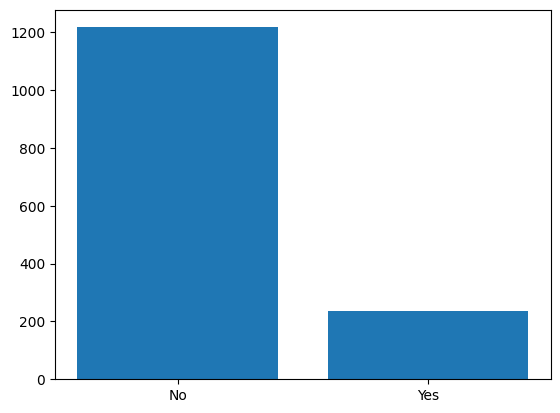

In [12]:
plt.bar(ibm["Attrition"].value_counts().keys(),ibm["Attrition"].value_counts())
plt.show()

In [13]:
ibm["Department"].value_counts()

Department
Research & Development    944
Sales                     445
Human Resources            63
Name: count, dtype: int64

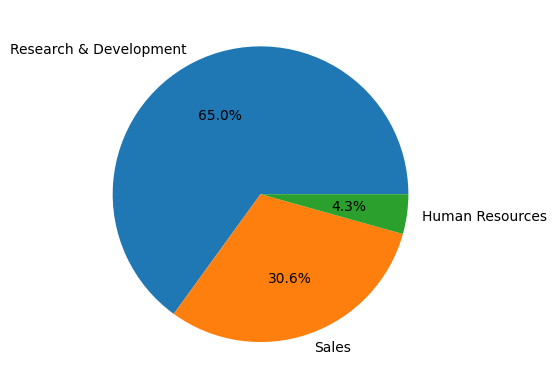

In [14]:
plt.pie(ibm["Department"].value_counts(),labels=ibm["Department"].value_counts().keys(),autopct="%0.001f%%")
plt.show()

In [15]:
ibm["EducationField"].value_counts()

EducationField
Life Sciences       595
Medical             458
Marketing           159
Technical Degree    132
Other                81
Human Resources      27
Name: count, dtype: int64

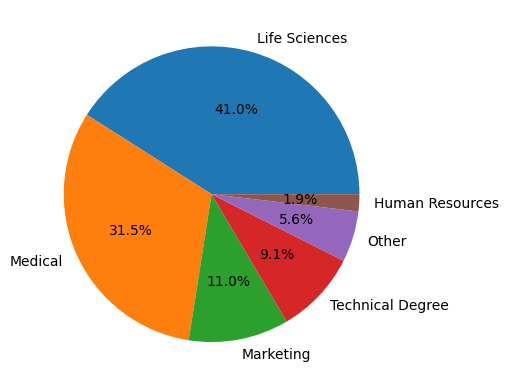

In [16]:
plt.pie(ibm["EducationField"].value_counts(),labels=ibm["EducationField"].value_counts().keys(),autopct="%0.01f%%")
plt.show()

In [17]:
ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
1,49.0,No,Research & Development,8.0,1,Life Sciences,3,2,Married,5130.0,1,3,10
20,24.0,No,Research & Development,11.0,2,Other,1,3,Divorced,4011.0,0,2,4
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
22,34.0,No,Research & Development,7.0,4,Life Sciences,1,2,Single,11994.0,0,3,12


In [18]:
ibm[(ibm["Attrition"] == "Yes") & (ibm["Department"] == "Sales")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
33,39.0,Yes,Sales,5.0,3,Technical Degree,4,4,Married,2086.0,3,4,1
36,50.0,Yes,Sales,3.0,2,Marketing,1,3,Married,2683.0,1,3,3
89,46.0,Yes,Sales,9.0,2,Medical,3,4,Single,9619.0,1,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31.0,Yes,Sales,26.0,4,Marketing,1,4,Married,5617.0,1,3,10
1396,53.0,Yes,Sales,24.0,4,Life Sciences,1,1,Single,10448.0,6,2,2
1438,23.0,Yes,Sales,9.0,3,Marketing,4,1,Married,1790.0,1,2,1
1452,50.0,Yes,Sales,1.0,4,Life Sciences,2,3,Divorced,6728.0,7,3,6


In [19]:
ibm[(ibm["Attrition"] == "Yes") & (ibm["Department"] == "Research & Development") & (ibm["EducationField"] == "Medical")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
24,34.0,Yes,Research & Development,6.0,1,Medical,2,1,Single,2960.0,2,3,4
34,24.0,Yes,Research & Development,1.0,3,Medical,2,4,Married,2293.0,2,2,2
69,36.0,Yes,Research & Development,9.0,3,Medical,4,3,Married,3388.0,0,2,1
126,58.0,Yes,Research & Development,23.0,4,Medical,4,4,Married,10312.0,1,2,40
140,32.0,Yes,Research & Development,9.0,3,Medical,1,1,Single,4200.0,7,4,5
204,38.0,Yes,Research & Development,29.0,1,Medical,2,1,Married,6673.0,7,3,1
229,29.0,Yes,Research & Development,18.0,1,Medical,3,4,Single,2389.0,1,2,4
234,33.0,Yes,Research & Development,14.0,3,Medical,3,4,Married,2436.0,5,1,5
250,37.0,Yes,Research & Development,10.0,3,Medical,1,3,Divorced,10048.0,6,3,1
259,31.0,Yes,Research & Development,29.0,2,Medical,3,2,Single,3479.0,0,4,5


In [20]:
ibm[(ibm["Attrition"] == "Yes") & (ibm["Department"] == "Sales") & (ibm["EducationField"] == "Life Sciences")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
124,31.0,Yes,Sales,6.0,4,Life Sciences,2,3,Married,6172.0,4,2,7
132,31.0,Yes,Sales,20.0,3,Life Sciences,2,3,Married,4559.0,3,3,2
370,21.0,Yes,Sales,12.0,3,Life Sciences,3,2,Single,2716.0,1,3,1
480,30.0,Yes,Sales,12.0,4,Life Sciences,2,1,Married,2033.0,1,4,1
504,45.0,Yes,Sales,26.0,4,Life Sciences,1,1,Married,4286.0,2,3,1
525,24.0,Yes,Sales,3.0,2,Life Sciences,1,3,Single,4577.0,9,3,2
566,47.0,Yes,Sales,27.0,2,Life Sciences,2,3,Single,6397.0,4,3,5
693,36.0,Yes,Sales,3.0,1,Life Sciences,3,4,Married,10325.0,1,3,16


In [21]:
ibm[(ibm["Attrition"] == "Yes") & (ibm["Department"] == "Human Resources") & (ibm["EducationField"] == "Marketing")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany


In [22]:
ibm[(ibm["Attrition"] == "Yes") & (ibm["Department"] == "Human Resources") & (ibm["EducationField"] == "Technical Degree")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
422,19.0,Yes,Human Resources,2.0,2,Technical Degree,1,4,Single,2564.0,1,4,1
1039,34.0,Yes,Human Resources,9.0,4,Technical Degree,1,3,Married,2742.0,1,3,2


In [23]:
ibm

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
1,49.0,No,Research & Development,8.0,1,Life Sciences,3,2,Married,5130.0,1,3,10
20,24.0,No,Research & Development,11.0,2,Other,1,3,Divorced,4011.0,0,2,4
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
22,34.0,No,Research & Development,7.0,4,Life Sciences,1,2,Single,11994.0,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Research & Development,23.0,2,Medical,3,4,Married,2571.0,4,3,5
1466,39.0,No,Research & Development,6.0,1,Medical,4,1,Married,9991.0,4,3,7
1467,27.0,No,Research & Development,4.0,3,Life Sciences,2,2,Married,6142.0,1,3,6
1468,49.0,No,Sales,2.0,3,Medical,4,2,Married,5390.0,2,2,9


In [24]:
ibm[(ibm["Attrition"] == "No") & (ibm["Department"] == "Research & Development") & (ibm["EducationField"] == "Medical")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
28,44.0,No,Research & Development,7.0,4,Medical,1,4,Married,10248.0,3,3,22
30,33.0,No,Research & Development,2.0,3,Medical,3,4,Single,2496.0,4,3,1
32,30.0,No,Research & Development,9.0,2,Medical,4,3,Single,2206.0,1,3,10
35,43.0,No,Research & Development,2.0,2,Medical,4,3,Divorced,2645.0,1,2,5
44,30.0,No,Research & Development,1.0,2,Medical,3,4,Single,4011.0,1,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,29.0,No,Research & Development,28.0,4,Medical,4,1,Single,3785.0,1,1,5
1463,31.0,No,Research & Development,5.0,3,Medical,2,1,Single,9936.0,0,3,9
1465,36.0,No,Research & Development,23.0,2,Medical,3,4,Married,2571.0,4,3,5
1466,39.0,No,Research & Development,6.0,1,Medical,4,1,Married,9991.0,4,3,7


In [25]:
ibm[(ibm["Attrition"] == "No") & (ibm["Department"] == "Sales") & (ibm["EducationField"] == "Life Sciences")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
39,33.0,No,Sales,1.0,3,Life Sciences,3,1,Married,5376.0,2,3,5
43,27.0,No,Sales,8.0,3,Life Sciences,4,3,Single,8726.0,1,3,9
56,35.0,No,Sales,18.0,5,Life Sciences,2,1,Married,9069.0,1,2,9
63,59.0,No,Sales,25.0,3,Life Sciences,1,1,Single,7637.0,7,2,21
70,59.0,No,Sales,1.0,1,Life Sciences,1,3,Single,5473.0,7,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,31.0,No,Sales,2.0,2,Life Sciences,1,3,Married,3067.0,0,3,2
1434,52.0,No,Sales,29.0,4,Life Sciences,1,4,Divorced,3482.0,2,2,9
1448,41.0,No,Sales,3.0,3,Life Sciences,3,2,Divorced,8938.0,2,3,5
1451,38.0,No,Sales,10.0,2,Life Sciences,1,4,Married,5343.0,1,3,10


In [26]:
ibm[(ibm["Attrition"] == "No") & (ibm["Department"] == "Sales") & (ibm["EducationField"] == "Life Sciences")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
39,33.0,No,Sales,1.0,3,Life Sciences,3,1,Married,5376.0,2,3,5
43,27.0,No,Sales,8.0,3,Life Sciences,4,3,Single,8726.0,1,3,9
56,35.0,No,Sales,18.0,5,Life Sciences,2,1,Married,9069.0,1,2,9
63,59.0,No,Sales,25.0,3,Life Sciences,1,1,Single,7637.0,7,2,21
70,59.0,No,Sales,1.0,1,Life Sciences,1,3,Single,5473.0,7,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,31.0,No,Sales,2.0,2,Life Sciences,1,3,Married,3067.0,0,3,2
1434,52.0,No,Sales,29.0,4,Life Sciences,1,4,Divorced,3482.0,2,2,9
1448,41.0,No,Sales,3.0,3,Life Sciences,3,2,Divorced,8938.0,2,3,5
1451,38.0,No,Sales,10.0,2,Life Sciences,1,4,Married,5343.0,1,3,10


In [27]:
ibm[(ibm["Attrition"] == "Yes") & (ibm["Department"] == "Sales") & (ibm["EducationField"] == "Life Sciences")]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
124,31.0,Yes,Sales,6.0,4,Life Sciences,2,3,Married,6172.0,4,2,7
132,31.0,Yes,Sales,20.0,3,Life Sciences,2,3,Married,4559.0,3,3,2
370,21.0,Yes,Sales,12.0,3,Life Sciences,3,2,Single,2716.0,1,3,1
480,30.0,Yes,Sales,12.0,4,Life Sciences,2,1,Married,2033.0,1,4,1
504,45.0,Yes,Sales,26.0,4,Life Sciences,1,1,Married,4286.0,2,3,1
525,24.0,Yes,Sales,3.0,2,Life Sciences,1,3,Single,4577.0,9,3,2
566,47.0,Yes,Sales,27.0,2,Life Sciences,2,3,Single,6397.0,4,3,5
693,36.0,Yes,Sales,3.0,1,Life Sciences,3,4,Married,10325.0,1,3,16


In [28]:
ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41.0,Yes,Sales,1.0,2,Life Sciences,2,4,Single,5993.0,8,1,6
1,49.0,No,Research & Development,8.0,1,Life Sciences,3,2,Married,5130.0,1,3,10
20,24.0,No,Research & Development,11.0,2,Other,1,3,Divorced,4011.0,0,2,4
21,36.0,Yes,Sales,9.0,4,Life Sciences,3,1,Single,3407.0,7,3,5
22,34.0,No,Research & Development,7.0,4,Life Sciences,1,2,Single,11994.0,0,3,12


In [29]:
ibm["MaritalStatus"].value_counts()

MaritalStatus
Married     667
Single      464
Divorced    321
Name: count, dtype: int64

In [30]:
ibm["Attrition"]=ibm["Attrition"].replace({"Yes": 1, "No": 0})

In [31]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1452 non-null   float64
 1   Attrition                1452 non-null   int64  
 2   Department               1452 non-null   object 
 3   DistanceFromHome         1452 non-null   float64
 4   Education                1452 non-null   int64  
 5   EducationField           1452 non-null   object 
 6   EnvironmentSatisfaction  1452 non-null   int64  
 7   JobSatisfaction          1452 non-null   int64  
 8   MaritalStatus            1452 non-null   object 
 9   MonthlyIncome            1452 non-null   float64
 10  NumCompaniesWorked       1452 non-null   int64  
 11  WorkLifeBalance          1452 non-null   int64  
 12  YearsAtCompany           1452 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 158.8+ KB


In [43]:
x = ibm.drop(["Age","Attrition", "Department", "EducationField", "MaritalStatus"], axis=1)

In [44]:
y=ibm["Attrition"]

In [45]:
x

,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,1.0,2,2,4,5993.0,8,1,6
1,8.0,1,3,2,5130.0,1,3,10
20,11.0,2,1,3,4011.0,0,2,4
21,9.0,4,3,1,3407.0,7,3,5
22,7.0,4,1,2,11994.0,0,3,12
...,...,...,...,...,...,...,...,...
1465,23.0,2,3,4,2571.0,4,3,5
1466,6.0,1,4,1,9991.0,4,3,7
1467,4.0,3,2,2,6142.0,1,3,6
1468,2.0,3,4,2,5390.0,2,2,9


In [46]:
y

0       1
1       0
20      0
21      1
22      0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1452, dtype: int64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

# Logistic Regression

In [48]:
LR=LogisticRegression()

In [49]:
LR.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_test=np.array(y_test).reshape(-1,1)

In [52]:
y_test

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [53]:
x.head(2)

,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,1.0,2,2,4,5993.0,8,1,6
1,8.0,1,3,2,5130.0,1,3,10


In [54]:
#Predict the values

In [55]:
LR.predict([[1.2,2,3,4,4000,5,3,8]])

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [56]:
LR.predict([[1.2,3,3,6,4000,3,2,7]])

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)